In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from dataset import Dataset
dataset = Dataset()

In [3]:
def get_image(patch, index):
    """
    Arguments:
      patch: patch image
      index: 0,1,2      
    """
    x = 5*index
    return patch[:, x:x+16].reshape([-1])

In [4]:
print(len(dataset.patches))
print(np.std(dataset.patches))
print(np.mean(dataset.patches))

2375
2.1438892
-0.0016897094


In [17]:
#k1 = 0.5
#k2 = 1.0

#k1 = 0.005
#k2 = 0.01

k1 = 0.5
k2 = 0.01

U_scale = 1.0
I_scale = 1.0

#sigma_sq    = 1.0
#sigma_sq    = 20.0
sigma_sq    = 30.0
sigma_sq_td = 10.0
alpha1      = 1.0
alpha2      = 0.05
lambd       = 0.02

iteration = 40

Us = (np.random.rand(3,256,32)-0.5) * U_scale
rs = np.zeros([3, 32], dtype=np.float32)

results = []
errors = []

patch_size = len(dataset.patches) # 2375

for k in range(patch_size):
    patch = dataset.patches[k]    
    rs = np.zeros([3, 32], dtype=np.float32)
    
    for i in range(iteration):
        for j in range(3):
            I = get_image(patch, j) * I_scale            
            r = rs[j]
            U = Us[j]
            Ur = U.dot(r)
            error = I - Ur
            dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[j] += dr
            Us[j] += dU
    if k % 100 == 0:
        print("us mean={} std={}".format(np.mean(Us[0]), np.std(Us[0])))                                    
        print("rs mean={} std={}".format(np.mean(rs), np.std(rs)))
    
    #if k % 40 == 0:
    #    k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

us mean=-0.002054219000370654 std=0.2862048284842086
rs mean=3.1767385456489153e-18 std=2.9141745033810576e-16
us mean=-0.0009335614955568406 std=0.1287726320332852
rs mean=-0.00011277839075773954 std=0.0068405806086957455
us mean=-0.00047251598436374304 std=0.05822458596936565
rs mean=-0.001593066263012588 std=0.01882801577448845
us mean=-0.0002407141416336004 std=0.026427041337778616
rs mean=-0.000913773663341999 std=0.009591425769031048
us mean=-0.0001421470434247419 std=0.01200610012699367
rs mean=6.330851633592974e-19 std=2.575416580144256e-17
us mean=-6.652754418315335e-05 std=0.005464328995383599
rs mean=1.2004796190012712e-05 std=0.0010425610234960914
us mean=-0.0018171524483601737 std=0.07933691021809543
rs mean=-0.07678714394569397 std=0.6377348303794861
us mean=0.004312206981612897 std=0.21402186095011333
rs mean=0.025591762736439705 std=0.3503810167312622
us mean=0.0063105851632034035 std=0.2380021852854909
rs mean=-0.02796442247927189 std=0.35253340005874634
us mean=0.0067

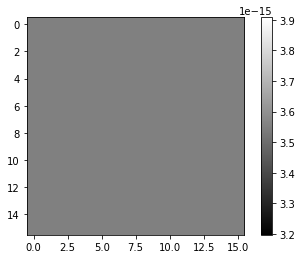

In [8]:
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

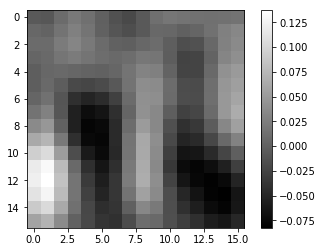

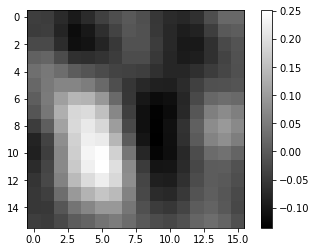

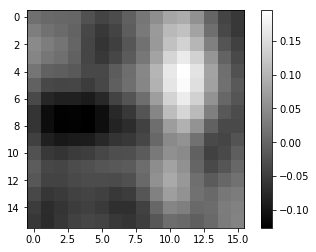

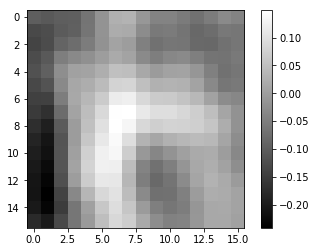

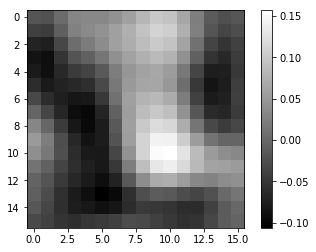

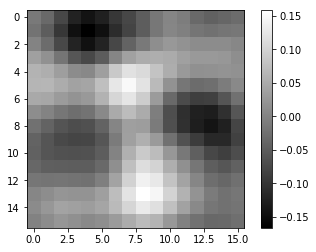

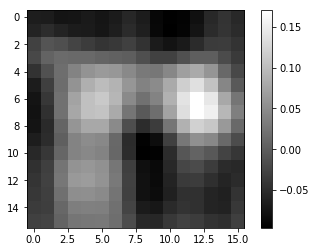

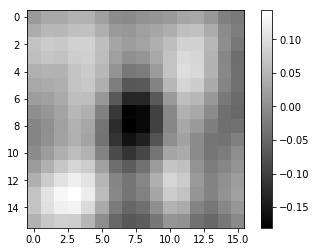

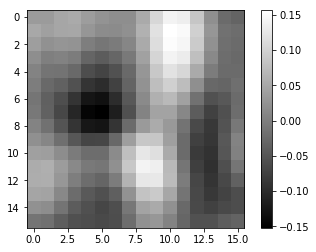

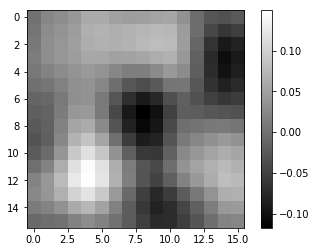

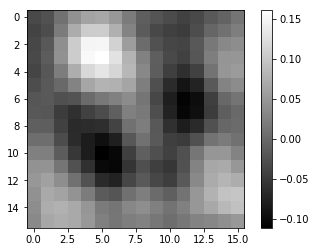

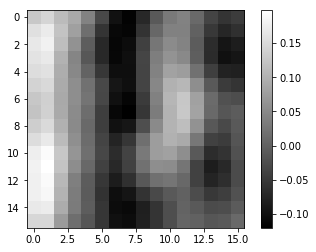

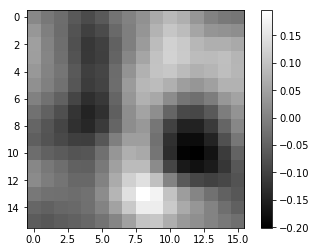

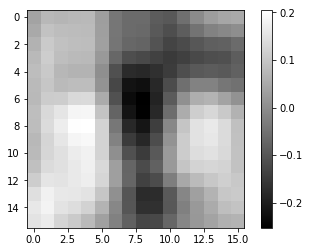

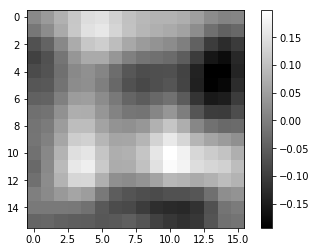

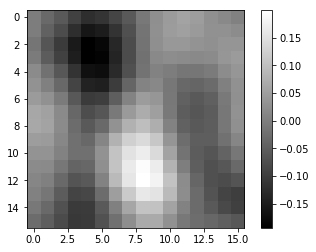

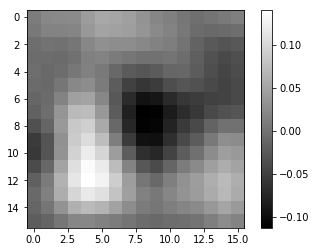

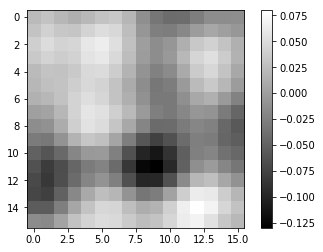

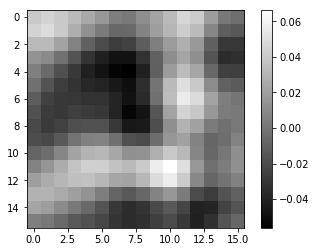

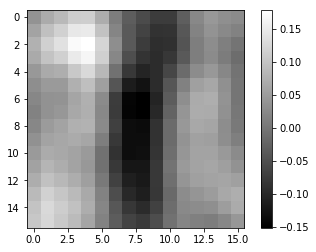

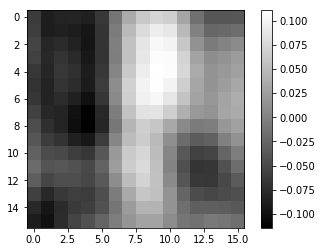

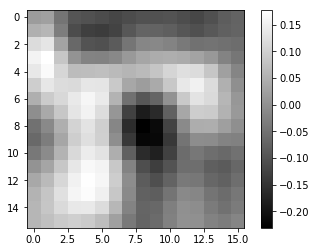

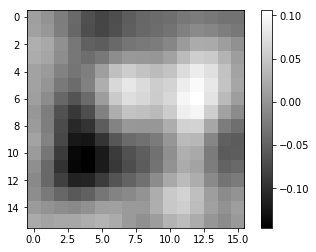

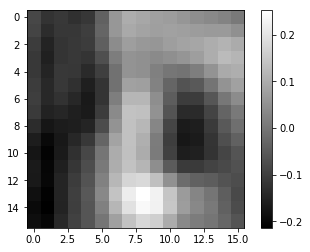

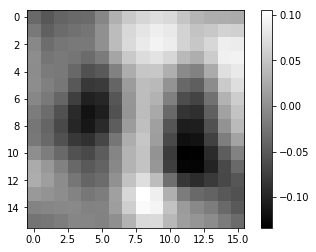

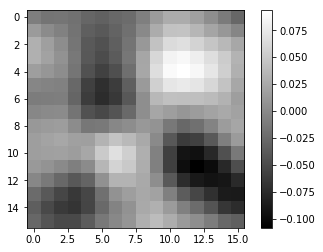

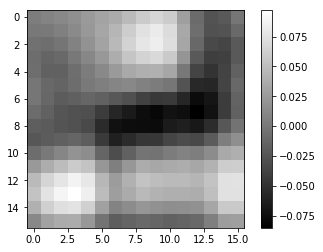

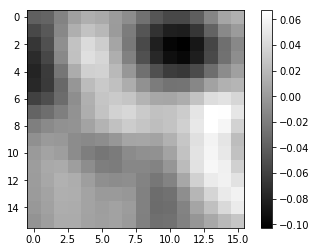

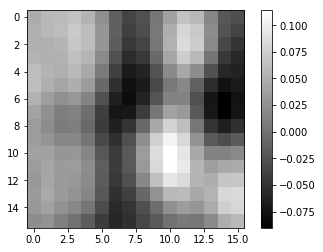

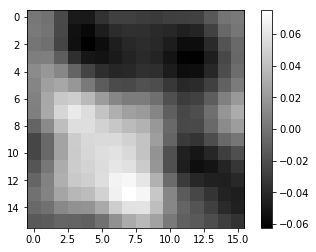

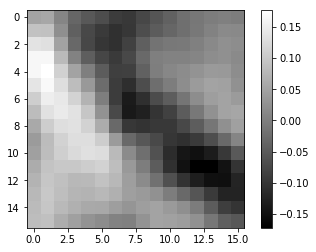

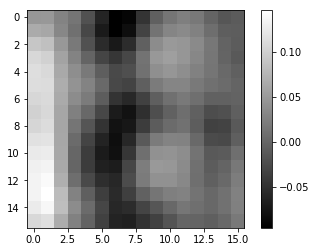

In [18]:
for i in range(32):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

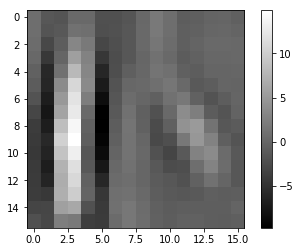

In [33]:
patch = dataset.patches[0]
for j in range(3):
    I = get_image(patch, j) * I_scale 
    
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
patch = dataset.patches[0]    
for i in range(iteration):
    j = 0
    I = get_image(patch, j) * I_scale            
    r = rs[j]
    U = Us[j]
    Ur = U.dot(r)
    error = I - Ur
    dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
    rs[j] += dr
    
    #if k % 40 == 0:
    #    k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        